#LINEAR REGRESSION

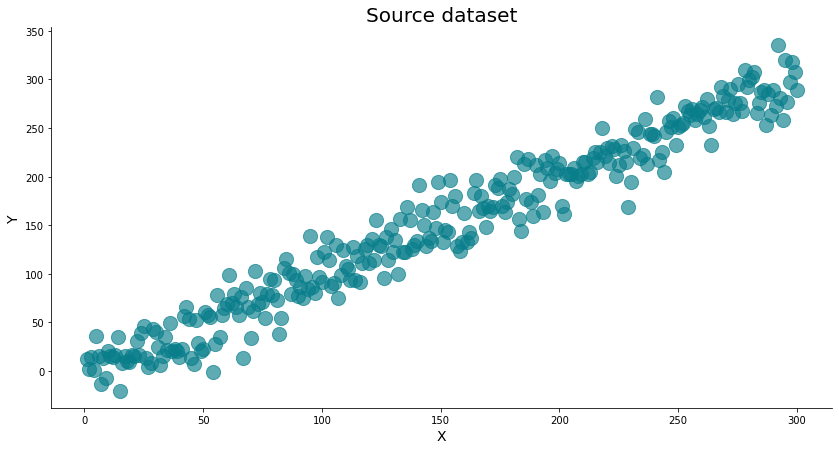

-4.070155101571061 1.0243905290507866
[204.90551282 269.44211615 152.66159584   6.17375019 235.6372287
 228.46649499 197.73477912 108.61280309   2.07618807 176.22257801
 239.73479081  55.34449558 220.27137076  43.05180923 183.39331171
 223.34454235 293.00309832 213.10063706 148.56403373 165.97867272
  76.85669669 112.71036521 252.02747716 253.05186769 103.49085045
  39.97863765 284.80797409 299.1494415  157.78354849 240.75918134
  14.36887442 164.95428219  30.75912289  21.53960812 217.19819917
 118.85670838   4.12496913  89.14938304  44.07619976  71.73474405
  92.22255463  74.80791564 289.92992674  58.41766717  75.83230616
  61.49083876 236.66161923 231.53966658 110.66158415 233.58844764
 181.34453066 144.46647161 241.78357187  73.78352511 301.19822256
 281.7348025   96.32011675  91.1981641  193.63721701  22.56399865]
[202.75324123 266.6059886  142.99869578  20.96694629 219.24546012
 226.56575842 220.91072931 107.57040907  15.92178588 169.77240925
 244.11411866  57.80180377 221.3651414

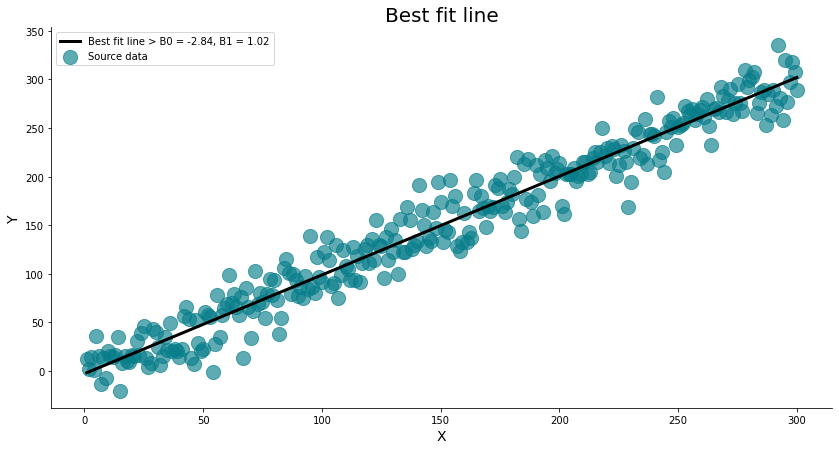

-4.070155101571061 [1.02439053]
17.916738387113966


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (14, 7)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

class SimpleLinearRegression:
    '''
    A class which implements simple linear regression model.
    '''
    def __init__(self):
        self.b0 = None
        self.b1 = None
    
    def fit(self, X, y):
        '''
        Used to calculate slope and intercept coefficients.
        
        :param X: array, single feature
        :param y: array, true values
        :return: None
        '''
        numerator = np.sum((X - np.mean(X)) * (y - np.mean(y)))
        denominator = np.sum((X - np.mean(X)) ** 2)
        self.b1 = numerator / denominator
        self.b0 = np.mean(y) - self.b1 * np.mean(X)
        
    def predict(self, X):
        '''
        Makes predictions using the simple line equation.
        
        :param X: array, single feature
        :return: None
        '''
        if not self.b0 or not self.b1:
            raise Exception('Please call `SimpleLinearRegression.fit(X, y)` before making predictions.')
        return self.b0 + self.b1 * X

X = np.arange(start=1, stop=301)
y = np.random.normal(loc=X, scale=20)

plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65)
plt.title('Source dataset', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.show()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SimpleLinearRegression()
model.fit(X_train, y_train)
preds = model.predict(X_test)

print(model.b0, model.b1)

print(preds)

print(y_test)

from sklearn.metrics import mean_squared_error

rmse = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))
print(rmse(y_test, preds))

model_all = SimpleLinearRegression()
model_all.fit(X, y)
preds_all = model_all.predict(X)

plt.scatter(X, y, s=200, c='#087E8B', alpha=0.65, label='Source data')
plt.plot(X, preds_all, color='#000000', lw=3, label=f'Best fit line > B0 = {model_all.b0:.2f}, B1 = {model_all.b1:.2f}')
plt.title('Best fit line', size=20)
plt.xlabel('X', size=14)
plt.ylabel('Y', size=14)
plt.legend()
plt.show()

from sklearn.linear_model import LinearRegression

sk_model = LinearRegression()
sk_model.fit(np.array(X_train).reshape(-1, 1), y_train)
sk_preds = sk_model.predict(np.array(X_test).reshape(-1, 1))

print(sk_model.intercept_, sk_model.coef_)

print(rmse(y_test, sk_preds))

Linear Regression Lib

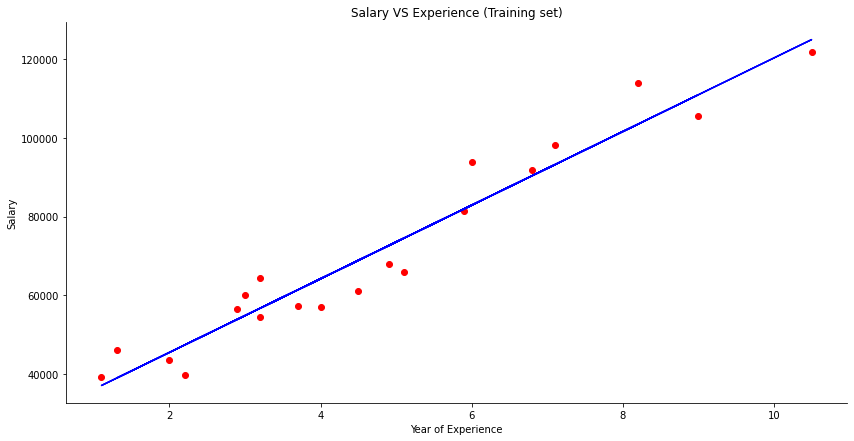

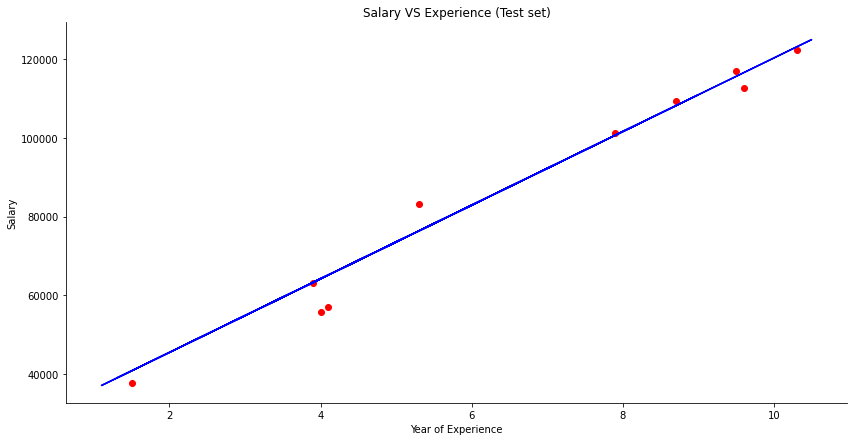

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
#dataset = pd.read_csv('181105_missing-data.csv')
dataset = pd.read_csv('salary_data.csv')
X = dataset.iloc[:, :-1].values #get a copy of dataset exclude last column
y = dataset.iloc[:, 1].values #get array of dataset in column 1st

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)



# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Visualizing the Training set results
viz_train = plt
viz_train.scatter(X_train, y_train, color='red')
viz_train.plot(X_train, regressor.predict(X_train), color='blue')
viz_train.title('Salary VS Experience (Training set)')
viz_train.xlabel('Year of Experience')
viz_train.ylabel('Salary')
viz_train.show()

# Visualizing the Test set results
viz_test = plt
viz_test.scatter(X_test, y_test, color='red')
viz_test.plot(X_train, regressor.predict(X_train), color='blue')
viz_test.title('Salary VS Experience (Test set)')
viz_test.xlabel('Year of Experience')
viz_test.ylabel('Salary')
viz_test.show()